# **Atividade Computacional**

Hiago Américo, 11218469

Gabriel Bacci, 11845984

## **Introdução**


O método dos mínimos quadrados foi publicado por Legendre em 1805, chamando atenção de grandes nomes da ciência naquela época. Logo após a publicação, Gauss conseguiu correlacionar o método com as teorias da probabilidade e à distribuição normal. Antes da técnica ser desenvolvida computacionalmente, já existia aplicação nos meados do século XIX. Astrônomos acompanhavam a rota do asteroide Ceres, mas perderam o caminho da gigante pedra quando entrou atrás do sol. A fim de descobrir a localização do Ceres sem resolver as equações não lineares de Kepler, o que custaria muito, foi aplicado o método desenvolvido por Gauss que seria a análise dos mínimos quadrados.

Os métodos dos mínimos quadrados tem como objetivo aproximar funções, sendo conhecida ou não, por uma combinação de funções conhecidas resultando em uma melhor aproximação possível. Sabemos que para aproximar funções, pode ser um trabalho um pouco quanto custoso e por isso esses métodos foram desenvolvidos computacionalmente a fim de ganhar eficiência na execução desta tarefa, sendo um desses métodos o Método dos Quadrados Móveis.






### **Método dos Quadrados Móveis**

Aplicamos o Método dos Quadrados Móveis neste exercício com o objetivo de ajustar polinômios para as diferentes curvas que aparecem na imagem (mydata). Nesta atividade, como solicitado, usaremos as funções polinomiais de grau 1, 2 e 3 definidas em nosso algoritmo. Consideramos também diferentes refinamentos para varrer os valores e vamos aplicar diferentes valores de $\rho$ na nossa função Gaussiana conforme o solicitado da atividade. E utilizando a linguagem de programação Python e aplicando os conhecimentos teóricos obtidos em aulas, precisaremos de algumas funções definidas no nosso algoritmo para o cumprimento do nosso objetivo.


## **Dados**

Fazendo a extrações dos dados pelo WebPlotDigitizer da imagem abaixo, podemos aplicar as informações necessárias no nosso método. Extraímos os valores dos pontos (x,y) das funções verdes e vermelhas de cada uma das imagens. Separamos os dados em partes para facilitar a aplicação e a declaração de variáveis.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


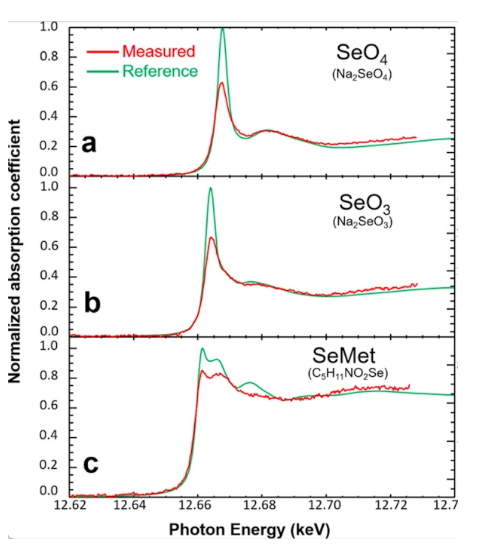

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
import cv2

path = cv2.imread('/content/drive/MyDrive/Analise_numerica/mydata.png')
cv2_imshow(path)


Após a extração, os dados foram salvos em ".csv", porém por causa do formato os valores de x e y antes e depois da vírgula ficaram separados em tabelas diferentes, logo foram necessárias realizar algumas manipulações para termos dados condizentes com o problema

Além disso, foram realizados diversos testes para descobrir os parâmetros que aproximam melhor cada parte da curva, mas por uma questão de facilidade, após o fim dos testes e de definirmos os parâmetros, os mesmos foram declarados neste bloco, para facilitar na plotagem dos gráficos

In [ ]:
# SeMeT
x1_verde = SemeT_verde['X1'] + SemeT_verde['X2'] / 1000000
y1_verde = SemeT_verde['Y2'] / 1000000
x1_vermelho = SemeT_vermelho['X1'] + SemeT_vermelho['X2'] / 1000000
y1_vermelho = SemeT_vermelho['Y2'] / 1000000

# SeO3
x2_verde = SeO3_verde['X1'] + SeO3_verde['X2'] / 1000000
y2_verde = SeO3_verde['Y2'] / 1000000
x2_vermelho = SeO3_vermelho['X1'] + SeO3_vermelho['X2'] / 1000000
y2_vermelho = SeO3_vermelho['Y2'] / 1000000

# SeO4
x3_verde = SeO4_verde['X1'] + SeO4_verde['X2'] / 1000000
y3_verde = SeO4_verde['Y2'] / 1000000
x3_vermelho = SeO4_vermelho['X1'] + SeO4_vermelho['X2'] / 1000000
y3_vermelho = SeO4_vermelho['Y2'] / 1000000

In [ ]:
# parametros de cada pedaco de cada parte das funcoes a serem aproximadas

# SeMet
c_verde_1_1 = 12.63                      # ""verde_1""  reta entre o intervalo (12.62,12.65)
le_verde_1_1 = 0.008
w_verde_1_1 = w_x(x1_verde,c_verde_1_1,le_verde_1_1)

c_verde_1_2 = 12.6598                     # aproxima por uma curva cubica o intervalo (12.6575,12.662) da funcao
le_verde_1_2 = 0.003
w_verde_1_2 = w_x(x1_verde,c_verde_1_2,le_verde_1_2)

c_verde_1_3 = 12.67                     # curva cubica entre o intervalo (12.663,12.68)
le_verde_1_3 = 0.0085
w_verde_1_3 = w_x(x1_verde,c_verde_1_3,le_verde_1_3)

c_verde_1_4 = 12.705                    # aproxima por uma reta o intervalo (12.685,12.72) da funcao
le_verde_1_4 = 0.01
w_verde_1_4 = w_x(x1_verde,c_verde_1_4,le_verde_1_4)

c_verde_1_5 = 12.73                    # aproxima por uma reta o intervalo (12.72,12.74) da funcao
le_verde_1_5 = 0.005
w_verde_1_5 = w_x(x1_verde,c_verde_1_5,le_verde_1_5)


c_vermelho_1_1 = 12.63                      # ""vermelho_1""  reta entre o intervalo (12.62,12.65)
le_vermelho_1_1 = 0.008
w_vermelho_1_1 = w_x(x1_vermelho,c_vermelho_1_1,le_vermelho_1_1)

c_vermelho_1_2 = 12.664                  # curva cubica entre o intervalo (12.65,12.67)
le_vermelho_1_2 = 0.006
w_vermelho_1_2 = w_x(x1_vermelho,c_vermelho_1_2,le_vermelho_1_2)

c_vermelho_1_3 = 12.68                    # curva quadratica entre o intervalo (12.67,12.69)
le_vermelho_1_3 = 0.006
w_vermelho_1_3 = w_x(x1_vermelho,c_vermelho_1_3,le_vermelho_1_3)

c_vermelho_1_4 = 12.705                         # reta entre o intervalo (12.69,12.72)
le_vermelho_1_4 = 0.01
w_vermelho_1_4 = w_x(x1_vermelho,c_vermelho_1_4,le_vermelho_1_4)




# SeO3
c_vermelho_2_1 = 12.64 # centro da gaussiana   # ""vermelho_2""  reta entre o intervalo (12.62,12.655)
le_vermelho_2_1 = 0.007 # raio da gaussiana
w_vermelho_2_1 = w_x(x2_vermelho,c_vermelho_2_1,le_vermelho_2_1)

c_vermelho_2_2 = 12.665                       # curva quadratica entre o intervalo (12.664,12.666)
le_vermelho_2_2 = 0.001
w_vermelho_2_2 = w_x(x2_vermelho,c_vermelho_2_2,le_vermelho_2_2)

c_vermelho_2_3 = 12.685                        # aproxima por uma curva quadratica o intervalo (12.67,12.70) da funcao
le_vermelho_2_3 = 0.005
w_vermelho_2_3 = w_x(x2_vermelho,c_vermelho_2_3,le_vermelho_2_3)  

c_vermelho_2_4 = 12.715                      # reta entre o intervalo (12.70,12.728)
le_vermelho_2_4 = 0.008
w_vermelho_2_4 = w_x(x2_vermelho,c_vermelho_2_4,le_vermelho_2_4)


c_verde_2_1 = 12.63                        # ""verde_2""  reta entre o intervalo (12.62,12.65)
le_verde_2_1 = 0.008
w_verde_2_1 = w_x(x2_verde,c_verde_2_1,le_verde_2_1)

c_verde_2_2 = 12.664                        # aproxima por uma curva cubica o intervalo (12.66,12.668) da funcao
le_verde_2_2 = 0.0025
w_verde_2_2 = w_x(x2_verde,c_verde_2_2,le_verde_2_2)

c_verde_2_3 = 12.69                       # aproxima por uma curva quadratica o intervalo (12.67,12.70) da funcao
le_verde_2_3 = 0.008
w_verde_2_3 = w_x(x2_verde,c_verde_2_3,le_verde_2_3)

c_verde_2_4 = 12.72                        # reta entre o intervalo (12.7,12.74)
le_verde_2_4 = 0.015
w_verde_2_4 = w_x(x2_verde,c_verde_2_4,le_verde_2_4)



# SeO4
c_vermelho_3_1 = 12.63                        # ""vermelho_3""  reta entre o intervalo (12.62,12.66)
le_vermelho_3_1 = 0.008
w_vermelho_3_1 = w_x(x3_vermelho,c_vermelho_3_1,le_vermelho_3_1) 

c_vermelho_3_2 = 12.6675                        # curva cubica entre o intervalo (12.664,12.671)
le_vermelho_3_2 = 0.0018
w_vermelho_3_2 = w_x(x3_vermelho,c_vermelho_3_2,le_vermelho_3_2)

c_vermelho_3_3 = 12.685                        # aproxima por uma reta o intervalo (12.678,12.70) da funcao
le_vermelho_3_3 = 0.005
w_vermelho_3_3 = w_x(x3_vermelho,c_vermelho_3_3,le_vermelho_3_3) 

c_vermelho_3_4 = 12.71                        # reta entre o intervalo (12.70,12.728)
le_vermelho_3_4 = 0.005
w_vermelho_3_4 = w_x(x3_vermelho,c_vermelho_3_4,le_vermelho_3_4)


c_verde_3_1 = 12.63                        # ""verde_3""  reta entre o intervalo (12.62,12.66)
le_verde_3_1 = 0.008
w_verde_3_1 = w_x(x3_verde,c_verde_3_1,le_verde_3_1)

c_verde_3_2 = 12.668                         # curva quadratica entre o intervalo (12.664,12.672)
le_verde_3_2 = 0.0026
w_verde_3_2 = w_x(x3_verde,c_verde_3_2,le_verde_3_2)

c_verde_3_3 = 12.68                        # aproxima por uma reta o intervalo (12.673,12.685) da funcao
le_verde_3_3 = 0.002
w_verde_3_3 = w_x(x3_verde,c_verde_3_3,le_verde_3_3)

c_verde_3_4 = 12.695                        # reta entre o intervalo (12.685,12.70)
le_verde_3_4 = 0.004
w_verde_3_4 = w_x(x3_verde,c_verde_3_4,le_verde_3_4)

c_verde_3_5 = 12.71                         # curva quadratica entre o intervalo (12.70,12.74)
le_verde_3_5 = 0.004
w_verde_3_5 = w_x(x3_verde,c_verde_3_5,le_verde_3_5)

# Geral

c_centro = 12.68                         #aproxima o grafico inteiro por um polinomio de grau 3
le_centro = 1000000                      # faz com que todos os pesos sejam igual a 1

w_centro_verde_1 = w_x(x1_verde,c_centro,le_centro)
w_centro_verde_2 = w_x(x2_verde,c_centro,le_centro)  
w_centro_verde_3 = w_x(x3_verde,c_centro,le_centro)    

w_centro_vermelho_1 = w_x(x1_vermelho,c_centro,le_centro)
w_centro_vermelho_2 = w_x(x2_vermelho,c_centro,le_centro)  
w_centro_vermelho_3 = w_x(x3_vermelho,c_centro,le_centro)

## Desenvolvimento

### **Funções em Python**

Neste bloco, foram definidas 6 funções, que serão usadas para auxiliar no cálculo dos mínimos quadrados móveis

A função "prod_int_w" calcula o produto interno, considerando os pesos w;

A função "funcao_peso" é usada para auxiliar no cálculo dos pesos w, pois como visto em aula, esses pesos são definidos através da função gaussiana;

A função "w_x" calcula o vetor de pesos w, com base no seu centro "c" e seu raio é controlado pelo parâmetro "le", para isso ela utiliza a função auxiliar "w_x_aux", que calcula o peso para um ponto:

A função "aproxima" calcula a aproximação da função por meio de um polinômio, utilizando "polinomio_aux", que identifica o grau do polinômio para o qual se deseja realizar a aproximação e realiza a aproximação para um ponto.

A função "gera_funcao" dá um print do polinômio pelo qual estamos aproximando a curva, com base em seus parâmetros, que devem ser fornecidos.

In [ ]:
# produto interno para o caso discreto, velando em conta os pesos w, supondo que as dimensoes dos 3 vetores sao iguais
def prod_int_w(u_1, u_2, w): 
  i = 0
  soma = 0
  while i < len(u_1):
    elem = u_1[i] * u_2[i] * w[i] # assume-se que os tres vetores tem o mesmo tamanho
    soma = soma + elem
    i = i + 1
  return soma

# Funcao Gaussiana
def funcao_peso(x):
  r = np.exp(((-1)*(x**2)))
  return r

# Calcula o peso em um ponto
def w_x_aux(x, c, le):
  w = funcao_peso(abs(x - c) / le)
  return w

# Calcula um vetor de pesos, com base em um vetor x, seu centro e seu raio
def w_x(x, c, le):
  i = 0
  w = np.zeros(len(x))
  while i < len(x):
    w[i] = w_x_aux(x[i],c,le)
    i = i + 1

  return w

In [ ]:
def polinomio_aux(X, x): # Calcula a aproximacao em um ponto, verificando o grau do polinomio
  if len(X[0]) == 4:
    pol = X[0][0] + X[0][1]*x + X[0][2]*(x**2) + X[0][3]*(x**3)
    return pol

  if len(X[0]) == 3:
    pol = X[0][0] + X[0][1]*x + X[0][2]*(x**2)
    return pol

  if len(X[0]) == 2:
    pol = X[0][0] + X[0][1]*x
    return pol

  return -1 # erro

def aproxima(X, x): # calcula a aproximacao polinomial
  i = 0
  aux = np.ones(len(x))

  while i < len(x):
    aux[i] = polinomio_aux(X,x[i])
    i = i + 1

  return aux

def gera_funcao(X):
  if len(X[0]) == 4:
    print("A função aproximada para este trecho é : ({:.2f})x^3 + ({:.2f})x^2 + ({:.2f})x + ({:.2f})".format(X[0][3], X[0][2], X[0][1], X[0][0]))

  if len(X[0]) == 3:
    print("A função aproximada para este trecho é : ({:.2f})x^2 + ({:.2f})x + ({:.2f})".format(X[0][2], X[0][1], X[0][0]))

  if len(X[0]) == 2:
    print("A função aproximada para este trecho é : ({:.2f})x + ({:.2f})".format(X[0][1], X[0][0]))

### **Função Método Quadrados Móveis**


Nesta parte, é definida a função "mqm" que calcula a aproximação, com base nos mínimos quadrados móveis, utilizando os conceitos vistos em aula, dados um vetor de pontos x, seus valores de função y, seu vetor de pesos w, que deve ser calculado utilizando a função "w_x" e o grau do polinômio para o qual se deseja aproximar a função.
Além disso, foi utilizada a função "linalg.lstsq" da biblioteca "numpy" para resolver o sistema linear necessário para achar os valores dos coeficientes do polinômio desejado.

Assume-se que x, y e w são vetores de mesmo tamanho

In [ ]:
def mqm(x, y, w, grau):
  u_0 = np.ones(len(x))
  u_1 = x
  u_2 = [i**2 for i in x]
  u_3 = [i**3 for i in x]

  # polinomio linear
  A = np.ones((2,2))

  A[0] = [prod_int_w(u_0, u_0, w), prod_int_w(u_0, u_1, w)]
  A[1] = [prod_int_w(u_1, u_0, w), prod_int_w(u_1, u_1, w)]

  # polinomio quadratico
  B = np.ones((3,3))

  B[0] = [prod_int_w(u_0, u_0, w), prod_int_w(u_0, u_1, w), prod_int_w(u_0, u_2, w)]
  B[1] = [prod_int_w(u_1, u_0, w), prod_int_w(u_1, u_1, w), prod_int_w(u_1, u_2, w)]
  B[2] = [prod_int_w(u_2, u_0, w), prod_int_w(u_2, u_1, w), prod_int_w(u_2, u_2, w)]

  # polinomio cubico
  C = np.ones((4,4))

  C[0] = [prod_int_w(u_0, u_0, w), prod_int_w(u_0, u_1, w), prod_int_w(u_0, u_2, w), prod_int_w(u_0, u_3, w)]
  C[1] = [prod_int_w(u_1, u_0, w), prod_int_w(u_1, u_1, w), prod_int_w(u_1, u_2, w), prod_int_w(u_1, u_3, w)]
  C[2] = [prod_int_w(u_2, u_0, w), prod_int_w(u_2, u_1, w), prod_int_w(u_2, u_2, w), prod_int_w(u_2, u_3, w)]
  C[3] = [prod_int_w(u_3, u_0, w), prod_int_w(u_3, u_1, w), prod_int_w(u_3, u_2, w), prod_int_w(u_3, u_3, w)]

  # funcao do polinomio linear
  f_1 = [prod_int_w(u_0, y, w), prod_int_w(u_1, y, w)]

  # funcao do polinomio quadratico
  f_2 = [prod_int_w(u_0, y, w), prod_int_w(u_1, y, w), prod_int_w(u_2, y, w)]

  # funcao do polinomio cubico
  f_3 = [prod_int_w(u_0, y, w), prod_int_w(u_1, y, w), prod_int_w(u_2, y, w), prod_int_w(u_3, y, w)]

  if grau == 1:
    X = np.linalg.lstsq(A, f_1, rcond=None) # resolve o sistema linear A(x)p*(x) = b(x) e da os valores de p*(x)

  if grau == 2:
    X = np.linalg.lstsq(B, f_2, rcond=None) # resolve o sistema linear A(x)p*(x) = b(x) e da os valores de p*(x)

  if grau == 3:
    X = np.linalg.lstsq(C, f_3, rcond=None) # resolve o sistema linear A(x)p*(x) = b(x) e da os valores de p*(x)

  return X

## Resultados


A imagem fornecida para a realização do trabalho foi dividida em 3 seções, SeMet, SeO3 e SeO4, nessa ordem.

Cada uma dessas seções foram separadas em 2 partes, a parte da curva verde e a parte da curva vermelha, para que fosse possível analisar cada uma das curvas presentes na imagem, ou seja, foi necessário realizar análises para descobrir parâmetros aceitáveis para cada uma dessas 6 partes.

Essas análises consistiram em observar graficamente se a aproximação se adequa a curva e observar os valores dos parâmetros da função aproximada.

Para a primeira parte (curva verde da SeMet) foram determinadas 6 escolhas de parâmetros diferentes, a primeira escolha foi para a curva inteira e as demais foram para trechos específicos dela.

Para a segunda parte (curva vermelha da SeMet) foram determinadas 5 escolhas de parâmetros diferentes, a primeira escolha foi para a curva inteira e as demais foram para trechos específicos dela.

Analogamente, foram determinados 5 escolhas de parâmetros para as partes 3 (curva verde da SeO3) e 4 (curva vermelha da SeO3), para a parte 5 (curva verde da SeO4) foram escolhidos 6 parâmetros e 5 foram determinados para a parte 6 (curva vermelha da SeO4)

### Plots das funções

Para cada uma das partes, foram plotados gráficos com os parâmetros determinados (centro da gaussiana "c" e "le", que controla o raio).

Em cada gráfico, existe uma curva azul, que representa a função peso calculada (w_x), um ponto vermelho representando o centro da gaussiana, uma curva verde, que representa a função original da imagem e uma curva vermelha representando a função polinomial que aproxima essa curva.

Os gráficos têm seus valores de x e y limitados, para permitir uma melhor visualização de cada trecho da curva e em alguns casos foram feitos um gráfico extra para ilustração, que será explicada na conclusão.

#### SeMet

##### verde_1

A função aproximada para este trecho é : (-11.95)x^3 + (300.88)x^2 + (-1858.23)x + (-445.41)


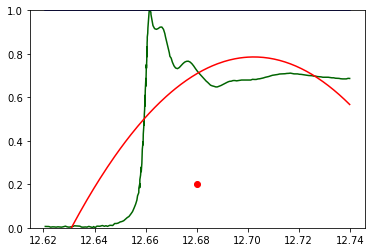

In [ ]:
# Aproximacao com um polinomio de grau 3, sem considerar os pesos

# Aproxima a funcao inteira

A função aproximada para este trecho é : (0.09)x + (-1.08)


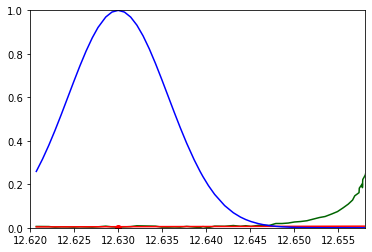

In [ ]:
# aproxima por uma reta o intervalo (12.62,12.65) da funcao

A função aproximada para este trecho é : (1.10)x^3 + (-13.71)x^2 + (-2.17)x + (-0.26)


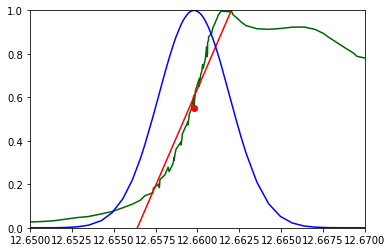

In [ ]:
# aproxima por uma curva cubica o intervalo (12.6575,12.662) da funcao

A função aproximada para este trecho é : (0.04)x^3 + (-0.55)x^2 + (-0.09)x + (-0.01)


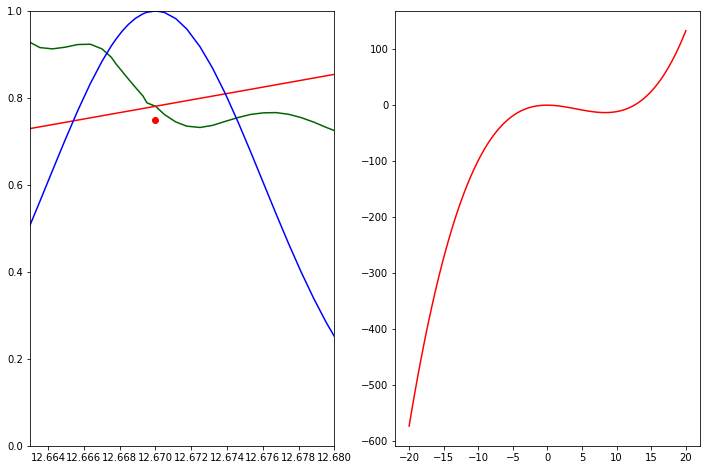

In [ ]:
# aproxima por uma curva cubica o intervalo (12.663,12.68) da funcao

# A imagem ao lado representa uma curva com os mesmos parametros da usada para aproximar o intervalo, mas para um intervalo maior de valores

A função aproximada para este trecho é : (1.63)x + (-20.00)


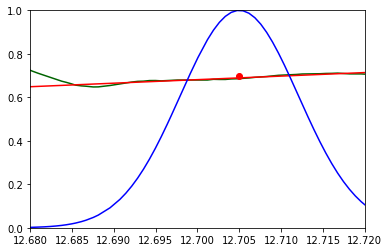

In [ ]:
# aproxima por uma reta o intervalo (12.685,12.72) da funcao

A função aproximada para este trecho é : (-1.12)x + (14.94)


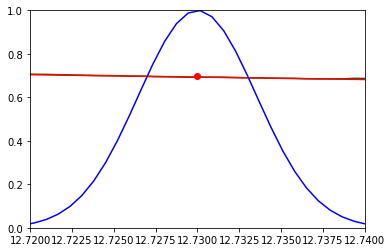

In [ ]:
# aproxima por uma reta o intervalo (12.72,12.74) da funcao

##### vermelho_1

A função aproximada para este trecho é : (-10.31)x^3 + (259.59)x^2 + (-1603.79)x + (-384.63)


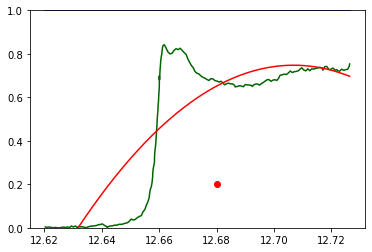

In [ ]:
# Aproximacao com um polinomio de grau 3, sem considerar os pesos

# Aproxima a funcao inteira

A função aproximada para este trecho é : (0.46)x + (-5.86)


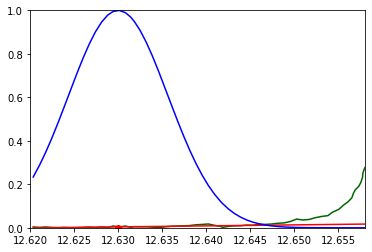

In [ ]:
# aproxima por uma reta o intervalo (12.62,12.65) da funcao

A função aproximada para este trecho é : (0.23)x^3 + (-2.92)x^2 + (-0.46)x + (-0.05)


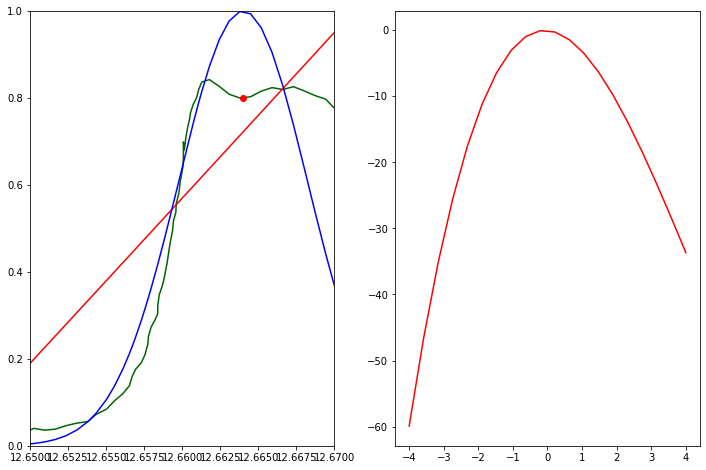

In [ ]:
# aproxima por uma curva cubica o intervalo (12.65,12.67) da funcao

# A imagem ao lado representa uma curva com os mesmos parametros da usada para aproximar o intervalo, mas para um intervalo maior de valores

A função aproximada para este trecho é : (-0.35)x^2 + (4.49)x + (0.71)


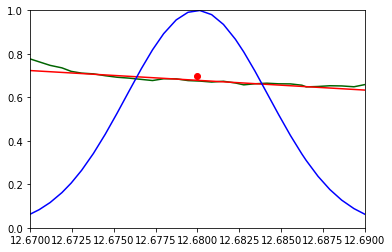

In [ ]:
# aproxima por uma curva quadratica o intervalo (12.67,12.69) da funcao

A função aproximada para este trecho é : (3.28)x + (-40.95)


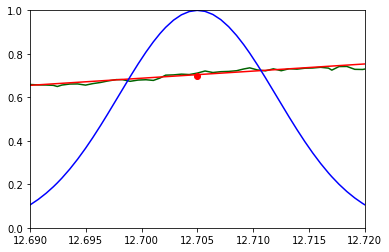

In [ ]:
# aproxima por uma reta o intervalo (12.69,12.72) da funcao

#### SeO3

##### verde_2

A função aproximada para este trecho é : (-10.67)x^3 + (268.17)x^2 + (-1654.05)x + (-396.45)


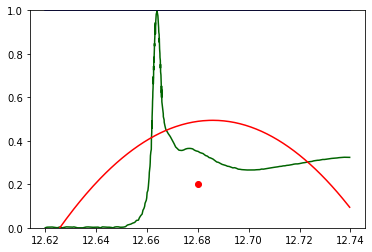

In [ ]:
# Aproximacao com um polinomio de grau 3, sem considerar os pesos

# Aproxima a funcao inteira

A função aproximada para este trecho é : (-0.01)x + (0.08)


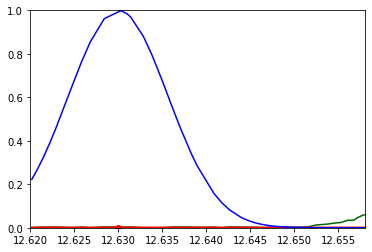

In [ ]:
# aproxima por uma reta o intervalo (12.62,12.65) da funcao

A função aproximada para este trecho é : (0.30)x^3 + (-3.79)x^2 + (-0.60)x + (-0.07)


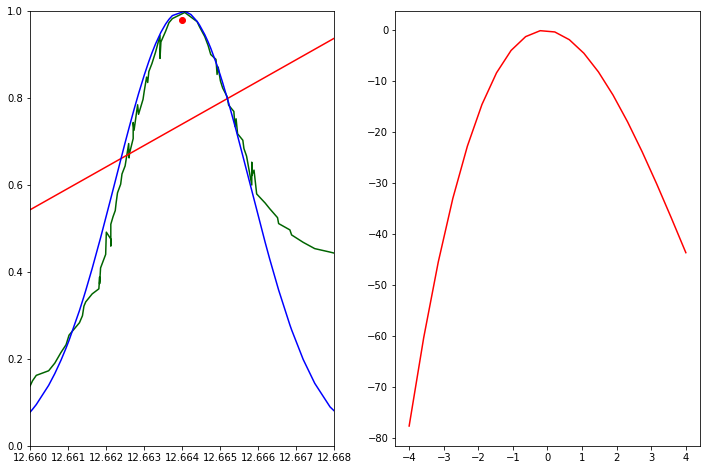

In [ ]:
# aproxima por uma curva cubica o intervalo (12.66,12.668) da funcao

# A imagem ao lado representa uma curva com os mesmos parametros da usada para aproximar o intervalo, mas para um intervalo maior de valores

A função aproximada para este trecho é : (-0.34)x^2 + (4.26)x + (0.67)


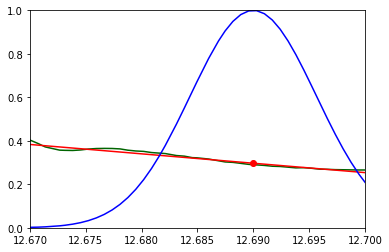

In [ ]:
# aproxima por uma curva quadratica o intervalo (12.67,12.70) da funcao

A função aproximada para este trecho é : (1.60)x + (-20.06)


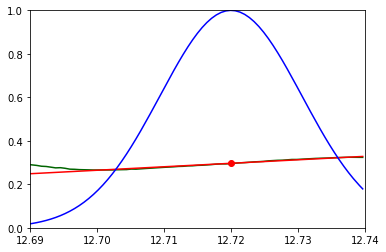

In [ ]:
# aproxima por uma reta o intervalo (12.70,12.74) da funcao

##### vermelho 2

A função aproximada para este trecho é : (-7.68)x^3 + (193.14)x^2 + (-1191.89)x + (-285.80)


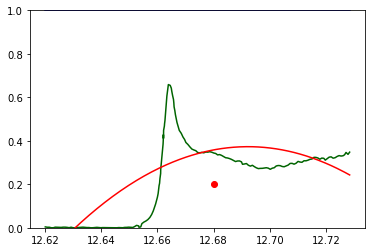

In [ ]:
# Aproximacao com um polinomio de grau 3, sem considerar os pesos

# Aproxima a funcao inteira

A função aproximada para este trecho é : (0.05)x + (-0.67)


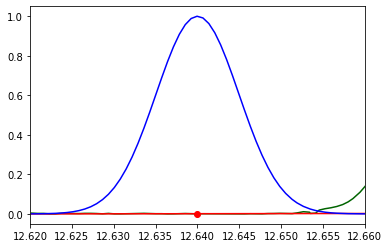

In [ ]:
# aproxima por uma reta o intervalo (12.62,12.655) da funcao

A função aproximada para este trecho é : (-2.38)x^2 + (29.86)x + (4.73)


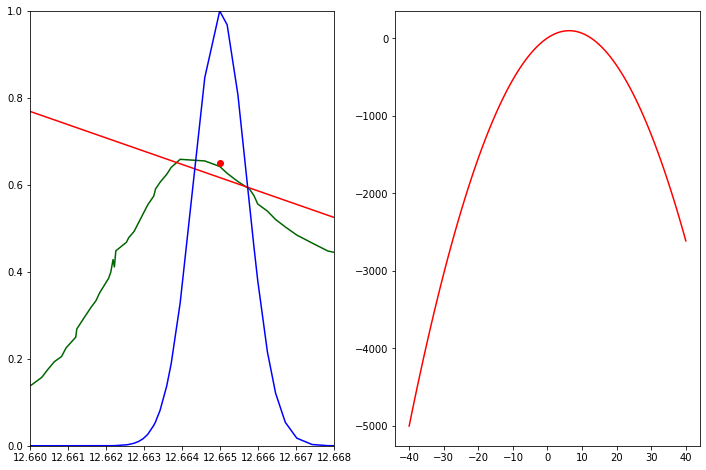

In [ ]:
# aproxima por uma curva quadratica o intervalo (12.664,12.666) da funcao

# A imagem ao lado representa uma curva com os mesmos parametros da usada para aproximar o intervalo, mas para um intervalo maior de valores

A função aproximada para este trecho é : (-0.34)x^2 + (4.26)x + (0.67)


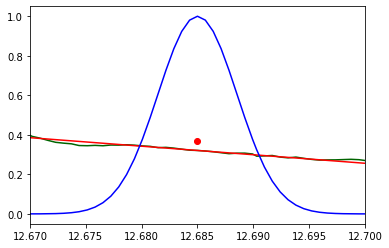

In [ ]:
# aproxima por uma curva quadratica o intervalo (12.67,12.70) da funcao

A função aproximada para este trecho é : (2.16)x + (-27.10)


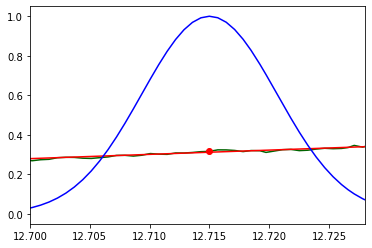

In [ ]:
# aproxima por uma reta o intervalo (12.70,12.728) da funcao

#### SeO4

##### verde_3

A função aproximada para este trecho é : (-10.50)x^3 + (263.93)x^2 + (-1627.71)x + (-390.09)


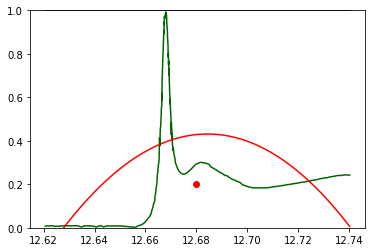

In [ ]:
# Aproximacao com um polinomio de grau 3, sem considerar os pesos

# Aproxima a funcao inteira

A função aproximada para este trecho é : (-0.05)x + (0.66)


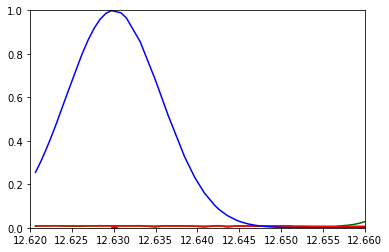

In [ ]:
# aproxima por uma reta o intervalo (12.62,12.66) da funcao

A função aproximada para este trecho é : (1.03)x^2 + (-12.86)x + (-2.04)


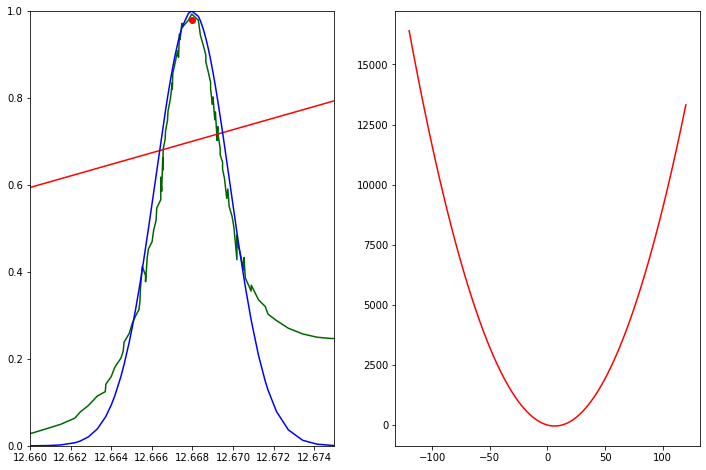

In [ ]:
# aproxima por uma curva quadratica o intervalo (12.664,12.672) da funcao

# A imagem ao lado representa uma curva com os mesmos parametros da usada para aproximar o intervalo, mas para um intervalo maior de valores

A função aproximada para este trecho é : (7.07)x + (-89.34)


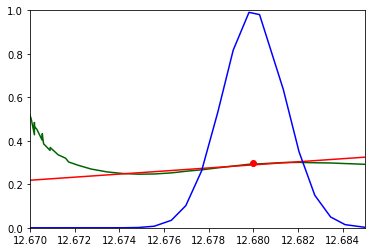

In [ ]:
# aproxima por uma reta o intervalo (12.673,12.685) da funcao

A função aproximada para este trecho é : (-5.95)x + (75.75)


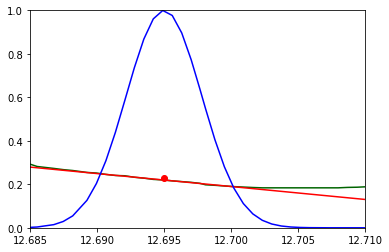

In [ ]:
# aproxima por uma reta o intervalo (12.685,12.70) da funcao

A função aproximada para este trecho é : (0.10)x^2 + (-1.30)x + (-0.21)


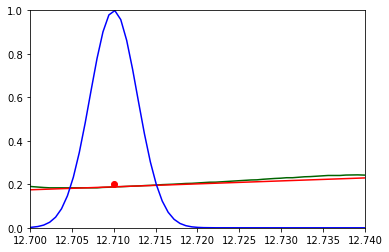

In [ ]:
# aproxima por uma curva quadratica o intervalo (12.70,12.74) da funcao

##### vermelho_3

A função aproximada para este trecho é : (-6.97)x^3 + (175.22)x^2 + (-1081.10)x + (-259.19)


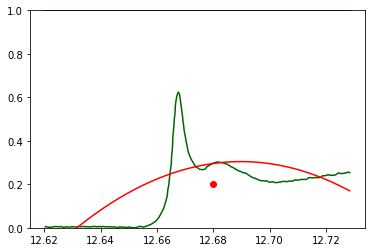

In [ ]:
# Aproximacao com um polinomio de grau 3, sem considerar os pesos

# Aproxima a funcao inteira

A função aproximada para este trecho é : (0.07)x + (-0.85)


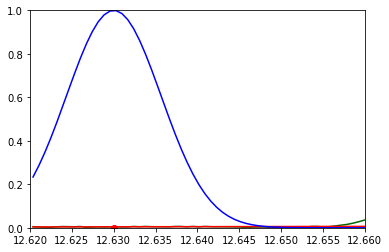

In [ ]:
# aproxima por uma reta o intervalo (12.62,12.66) da funcao

A função aproximada para este trecho é : (0.19)x^3 + (-2.41)x^2 + (-0.38)x + (-0.05)


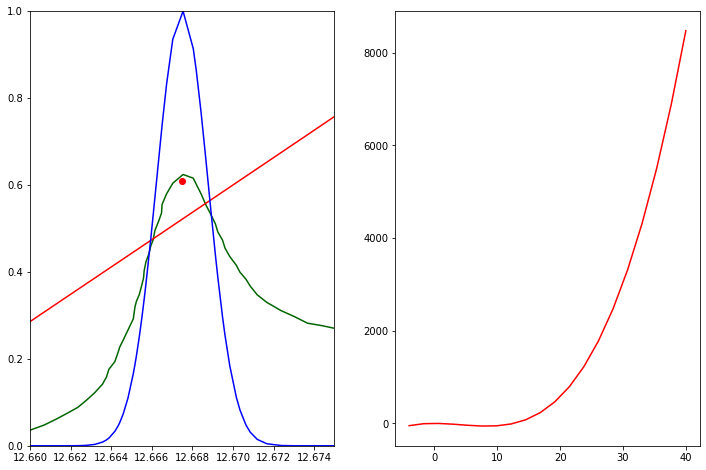

In [ ]:
# aproxima por uma curva cubica o intervalo (12.664,12.671) da funcao

# A imagem ao lado representa uma curva com os mesmos parametros da usada para aproximar o intervalo, mas para um intervalo maior de valores

A função aproximada para este trecho é : (-3.70)x + (47.18)


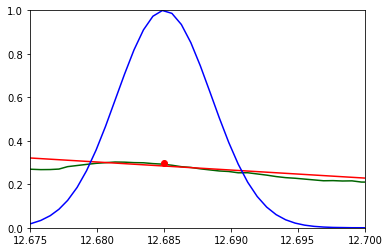

In [ ]:
# aproxima por uma reta o intervalo (12.678,12.70) da funcao

A função aproximada para este trecho é : (1.67)x + (-20.99)


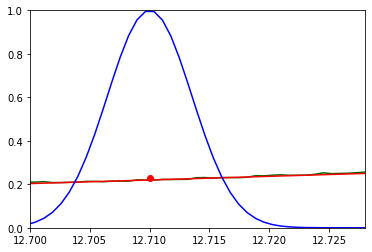

In [ ]:
# aproxima por uma reta o intervalo (12.70,12.728) da funcao

## **Conclusão**


Para facilitar a análise, todos os gráficos foram plotados em sequência, por exemplo, caso seja citado o gráfico 3 da parte 5 (curva verde do SeO4) estamos nos referindo à terceira imagem desta seção.

Foi perceptível que o primeiro gráfico (onde o vetor de pesos w_x tem todas as posições iguais a 1) de todos as partes não apresentou uma boa aproximação para a função, um dos prováveis motivos para isso é que a função apresenta muitas curvas, logo uma função polinomial, de no máximo grau 3, não é uma boa aproximação para ela.

O segundo gráfico de todas as partes apresenta uma boa aproximação para a função e é possível perceber que o parâmetro da variável x é pequeno, isso acontece pois nesses trechos de curva, a função praticamente é constante e igual a zero, o que nos leva a concluir que aproximar a curva nessa parte por uma constante (0) pode também nos levar a uma boa aproximação.

Nas demais retas das partes 1 e 2 (SeMet) também foi constatado uma boa aproximação.

No gráfico 3 da parte 1, foi utilizado um polinômio de 3 grau para aproximar a função, apresentando um resultado mediano, sendo que neste trecho esta curva cúbica se assemelha a uma reta, um dos possíveis motivos para isso é que o intervalo de valores de x utilizado foi pequeno.

No gráfico 4 da parte 1, foi possível notar que os parâmetros de x^3 e x^2 tiveram valores próximos de zero, o que pode indicar que um polinômio de grau 2 seria mais adequado para esse caso, ou que são necessárias alterações nos parâmetros "c" e "le" da função peso. Além disso, o grupo não conseguiu encontrar parâmetros que dessem uma boa aproximação para este trecho, como é o caso dessa função que não apresenta uma boa aproximação para este trecho da curva, um dos possíveis motivos para isso é que o intervalo de valores de x neste pedaço é bem pequeno, pois pode-se notar que aumentando o intervalo de x, a função de fato representa uma curva, ao invés de uma reta, como é mostrado na imagem ao lado deste gráfico.

Analogamente, o gráfico 3 da parte 2 teve os mesmos problemas mencionados anteriormente e o gráfico 4, também dessa parte, apresenta uma boa aproximação para seu trecho, porém o parâmetro associado ao x^2 é próximo de zero, o que pode significar que uma reta já traria uma boa aproximação para esse pedaço.

O gráfico 3 das partes 3 e 4 (SeO3) apresentou os mesmos problemas mencionados no gráfico 3 da parte 1 e 2, sendo que na parte 4 foi utilizado um polinômio de grau 2 e nenhum de seus parâmetros apresentou um valor próximo de zero.

O gráfico 4 das partes 3 e 4 forneceu uma boa aproximação para seus trechos, porém teve seu valor de parâmetro associado a x^2 perto de zero, indicando que talvez uma reta seria mais recomendada nesses casos. As demais retas dessas partes apresentaram um bom resultado.

De forma similar ao que foi mencionado anteriormente, o gráfico 3 das partes 5 e 6 (SeO4) também não apresentaram uma boa aproximação.

Os gráficos 4, 5 e 6 da parte 5 apresentaram uma boa aproximação para seus respectivos trechos, porém o gráfico 6 também teve seu parâmetro associado ao x^2 perto de zero.

As demais retas da parte 6 também apresentaram bons resultados.

Portanto, podemos concluir que, no geral, para as curvas obtidas através da imagem fornecida a técnica de aproximação dos mínimos quadrados móveis teve um resultado satisfatório.